In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [7]:
original_data = pd.read_csv("Affairs .csv", sep=",")


In [8]:
data = original_data.drop_duplicates()
data

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3
...,...,...,...,...,...,...,...,...,...,...
596,1938,1,male,22.0,1.50,yes,1,12,2,5
597,1941,7,female,32.0,10.00,yes,2,18,5,4
598,1954,2,male,32.0,10.00,yes,2,17,6,5
599,1959,2,male,22.0,7.00,yes,3,18,6,2


In [9]:
data = data.drop(columns=["Unnamed: 0", "rating"])
data.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation
0,0,male,37.0,10.00,no,3,18,7
1,0,female,27.0,4.00,no,4,14,6
2,0,female,32.0,15.00,yes,1,12,1
3,0,male,57.0,15.00,yes,5,18,6
4,0,male,22.0,0.75,no,2,17,6


In [10]:
data.shape

(601, 8)

In [11]:
data.columns

Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation'],
      dtype='object')

In [12]:
data.dtypes

affairs            int64
gender            object
age              float64
yearsmarried     float64
children          object
religiousness      int64
education          int64
occupation         int64
dtype: object

In [13]:
data.isnull().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
dtype: int64

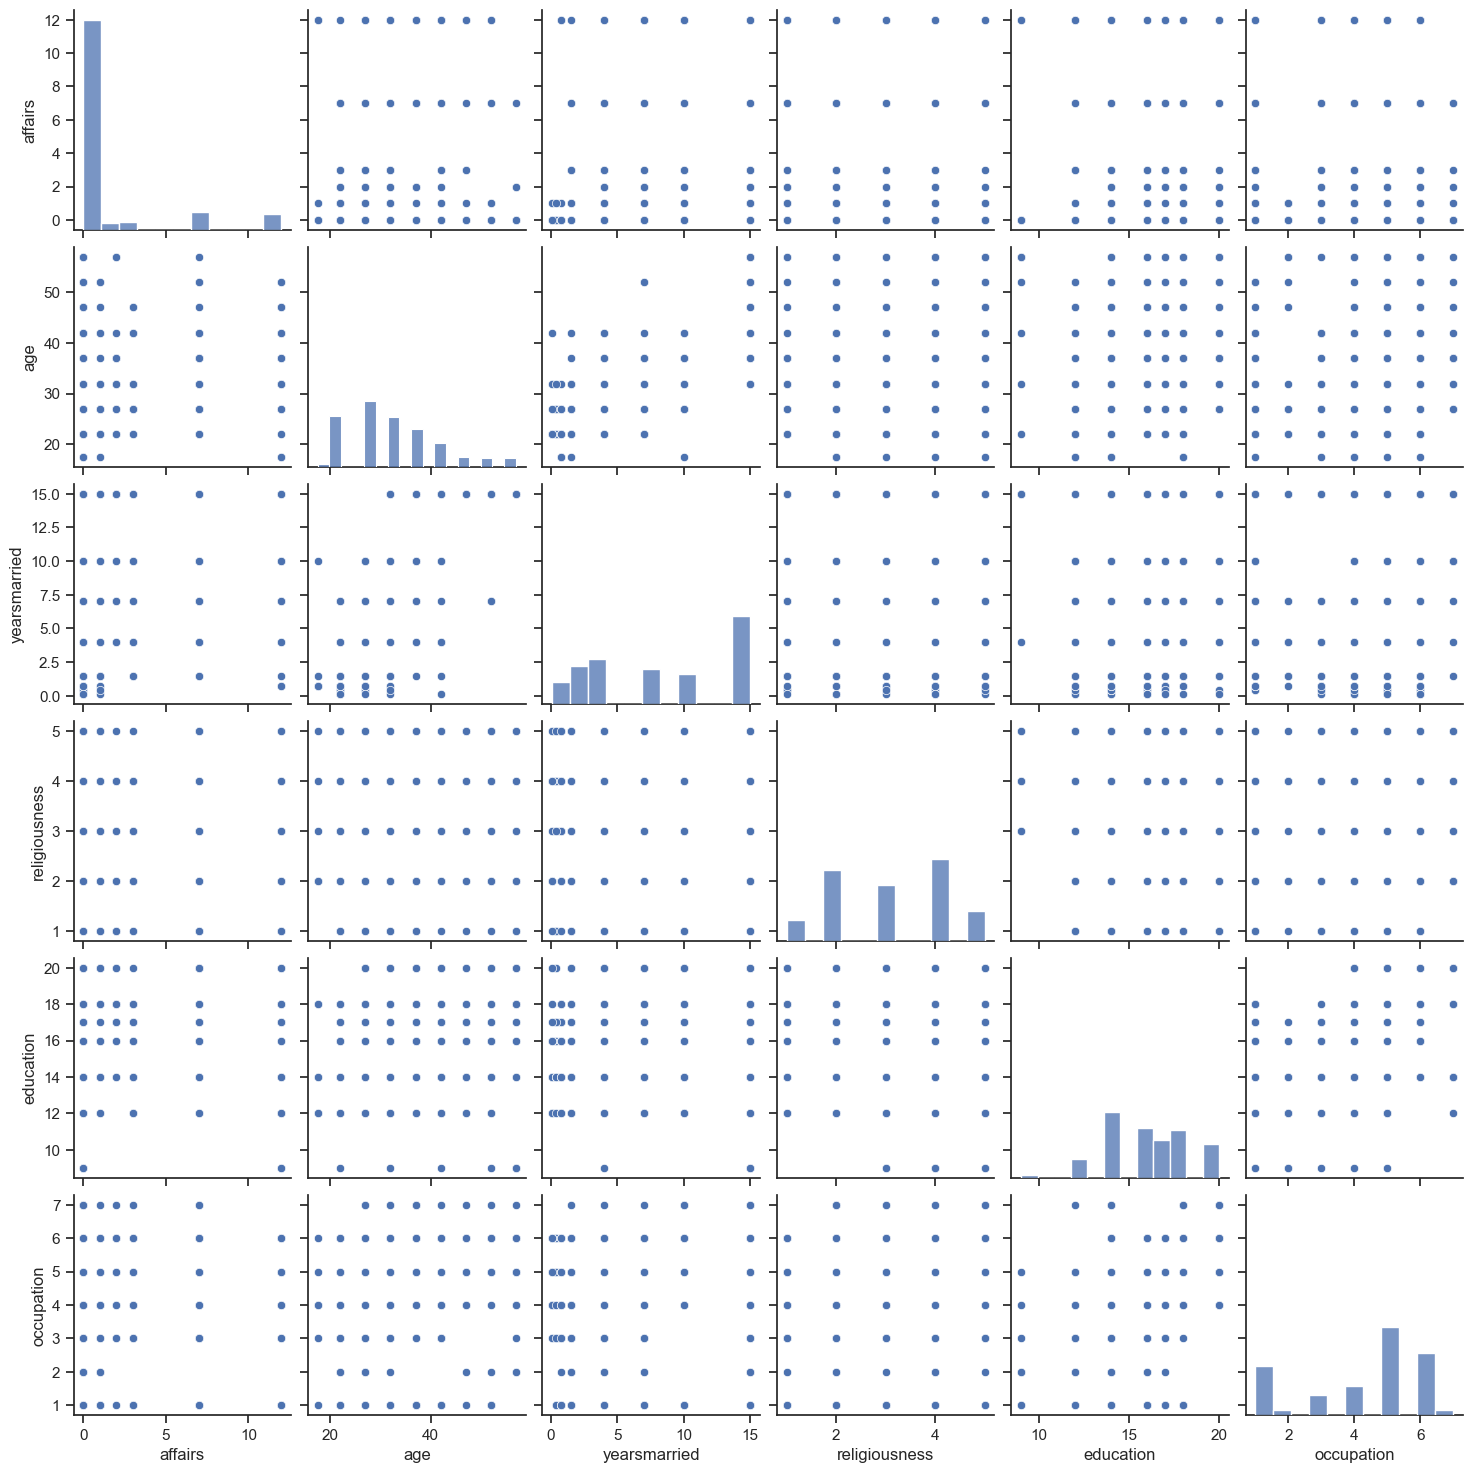

In [14]:
#парные диаграммы
sns.pairplot(data)

In [15]:
data.describe()

,affairs,age,yearsmarried,religiousness,education,occupation
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676
std,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443
min,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000
25%,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000
50%,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000
75%,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000
max,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000


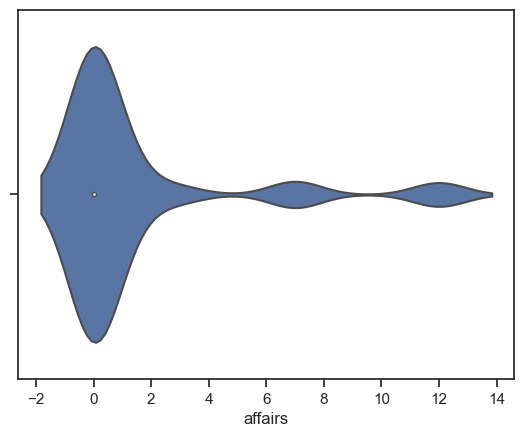

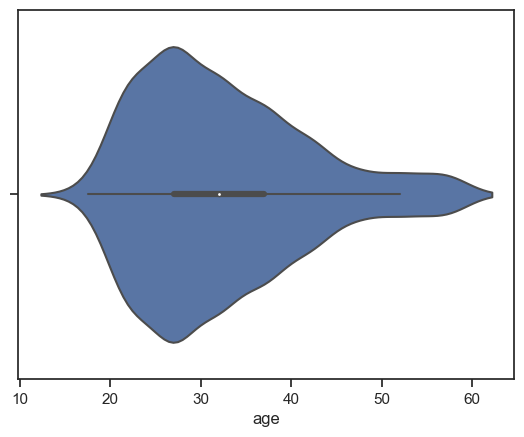

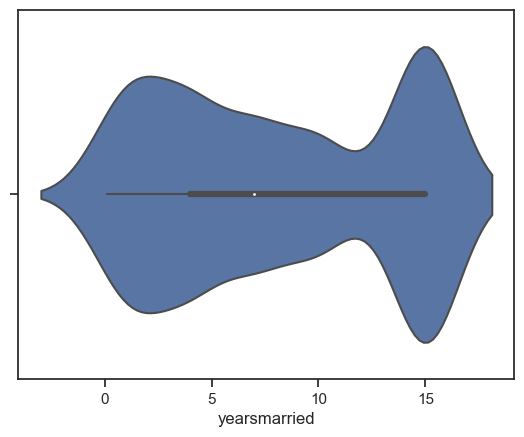

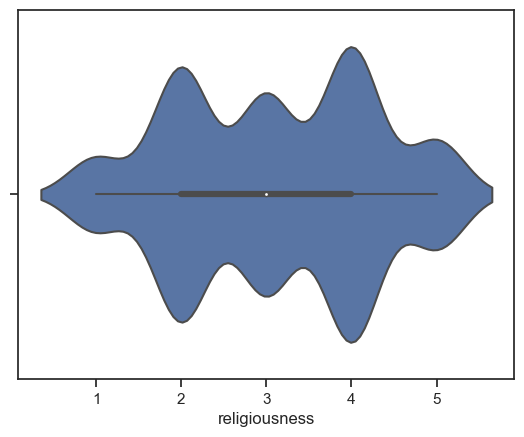

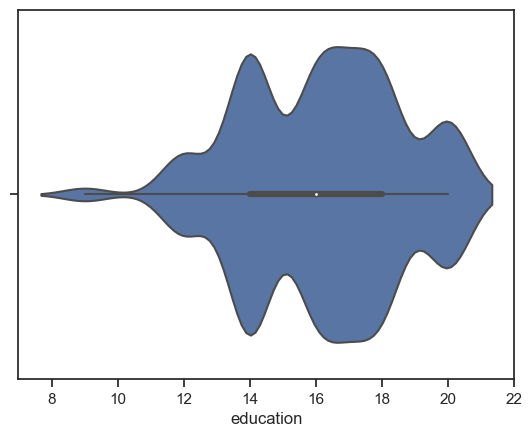

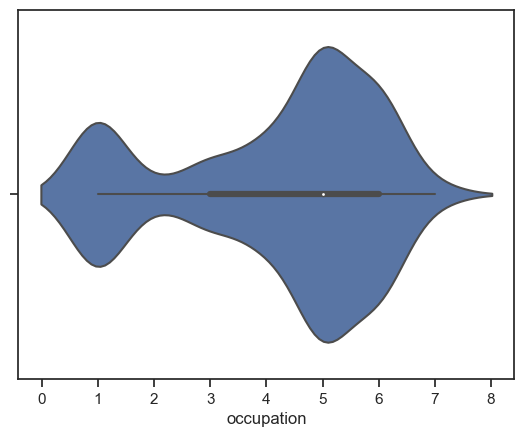

In [16]:
for col in ['affairs', 'age', 'yearsmarried', 'religiousness', 'education', 'occupation']:
    sns.violinplot(x=data[col])
    plt.show()

In [17]:
data.dtypes

affairs            int64
gender            object
age              float64
yearsmarried     float64
children          object
religiousness      int64
education          int64
occupation         int64
dtype: object

In [18]:
#Для построения моделей будем использовать все признаки

In [19]:
data

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation
0,0,male,37.0,10.00,no,3,18,7
1,0,female,27.0,4.00,no,4,14,6
2,0,female,32.0,15.00,yes,1,12,1
3,0,male,57.0,15.00,yes,5,18,6
4,0,male,22.0,0.75,no,2,17,6
...,...,...,...,...,...,...,...,...
596,1,male,22.0,1.50,yes,1,12,2
597,7,female,32.0,10.00,yes,2,18,5
598,2,male,32.0,10.00,yes,2,17,6
599,2,male,22.0,7.00,yes,3,18,6


In [20]:
yn_dict = {'male': 1, 'female': 0}
data['gender'] = data['gender'].map(yn_dict)
Y = pd.DataFrame(data["affairs"]).values
X = data.drop(columns=["affairs"]).values

In [21]:
data

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation
0,0,1,37.0,10.00,no,3,18,7
1,0,0,27.0,4.00,no,4,14,6
2,0,0,32.0,15.00,yes,1,12,1
3,0,1,57.0,15.00,yes,5,18,6
4,0,1,22.0,0.75,no,2,17,6
...,...,...,...,...,...,...,...,...
596,1,1,22.0,1.50,yes,1,12,2
597,7,0,32.0,10.00,yes,2,18,5
598,2,1,32.0,10.00,yes,2,17,6
599,2,1,22.0,7.00,yes,3,18,6


In [22]:
new_children = {'yes': 1, 'no': 0}
data['children'] = data['children'].map(new_children)
Y = pd.DataFrame(data["affairs"]).values
X = data.drop(columns=["affairs"]).values

In [23]:
data

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation
0,0,1,37.0,10.00,0,3,18,7
1,0,0,27.0,4.00,0,4,14,6
2,0,0,32.0,15.00,1,1,12,1
3,0,1,57.0,15.00,1,5,18,6
4,0,1,22.0,0.75,0,2,17,6
...,...,...,...,...,...,...,...,...
596,1,1,22.0,1.50,1,1,12,2
597,7,0,32.0,10.00,1,2,18,5
598,2,1,32.0,10.00,1,2,17,6
599,2,1,22.0,7.00,1,3,18,6


In [24]:
data.describe()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,0.475874,32.487521,8.177696,0.715474,3.116473,16.166389,4.194676
std,3.298758,0.499834,9.288762,5.571303,0.451564,1.167509,2.402555,1.819443
min,0.000000,0.000000,17.500000,0.125000,0.000000,1.000000,9.000000,1.000000
25%,0.000000,0.000000,27.000000,4.000000,0.000000,2.000000,14.000000,3.000000
50%,0.000000,0.000000,32.000000,7.000000,1.000000,3.000000,16.000000,5.000000
75%,0.000000,1.000000,37.000000,15.000000,1.000000,4.000000,18.000000,6.000000
max,12.000000,1.000000,57.000000,15.000000,1.000000,5.000000,20.000000,7.000000


In [25]:
scale_cols = ['age', 'yearsmarried', 'religiousness', 'education', 'occupation']

In [26]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [27]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [28]:
data.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,age_scaled,yearsmarried_scaled,religiousness_scaled,education_scaled,occupation_scaled
0,0,1,37.0,10.00,0,3,18,7,0.493671,0.663866,0.50,0.818182,1.000000
1,0,0,27.0,4.00,0,4,14,6,0.240506,0.260504,0.75,0.454545,0.833333
2,0,0,32.0,15.00,1,1,12,1,0.367089,1.000000,0.00,0.272727,0.000000
3,0,1,57.0,15.00,1,5,18,6,1.000000,1.000000,1.00,0.818182,0.833333
4,0,1,22.0,0.75,0,2,17,6,0.113924,0.042017,0.25,0.727273,0.833333


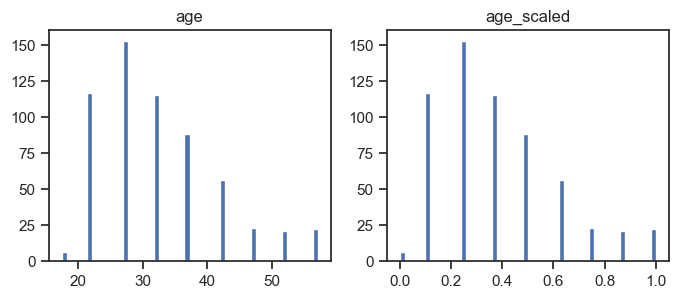

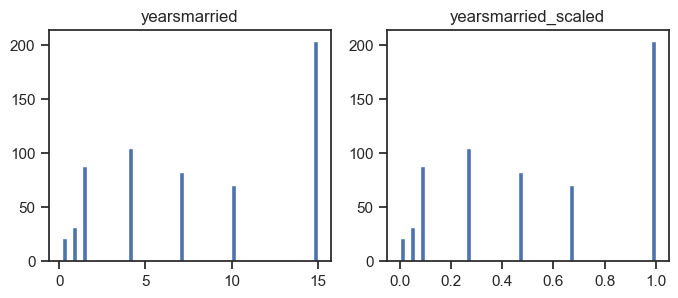

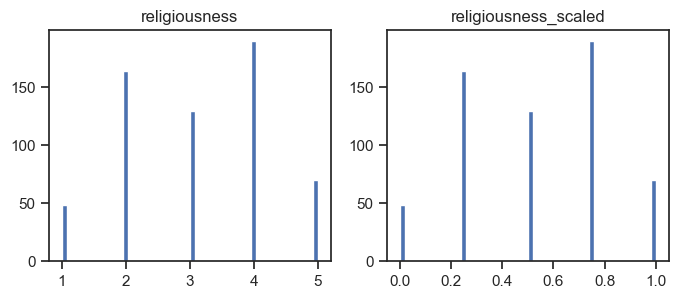

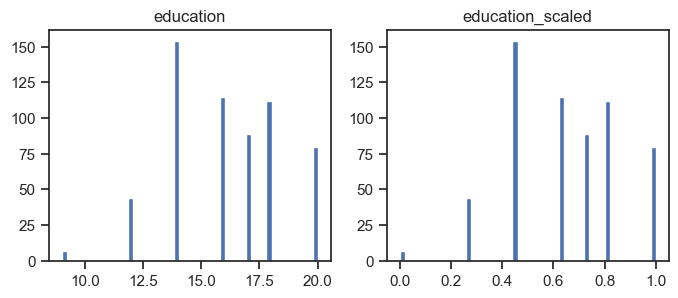

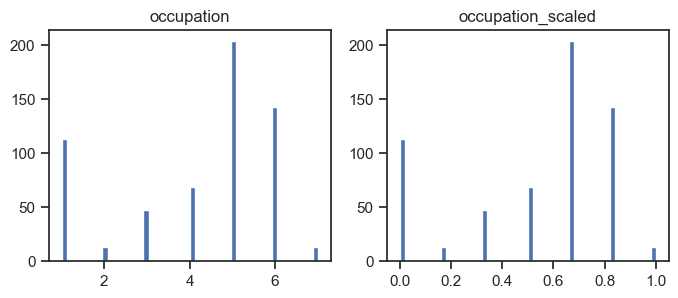

In [29]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [30]:
corr_cols_1 = scale_cols + ['gender'] + ['children'] + ['affairs']
corr_cols_1

['age',
 'yearsmarried',
 'religiousness',
 'education',
 'occupation',
 'gender',
 'children',
 'affairs']

In [31]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['gender'] + ['children'] + ['affairs']
corr_cols_2

['age_scaled',
 'yearsmarried_scaled',
 'religiousness_scaled',
 'education_scaled',
 'occupation_scaled',
 'gender',
 'children',
 'affairs']

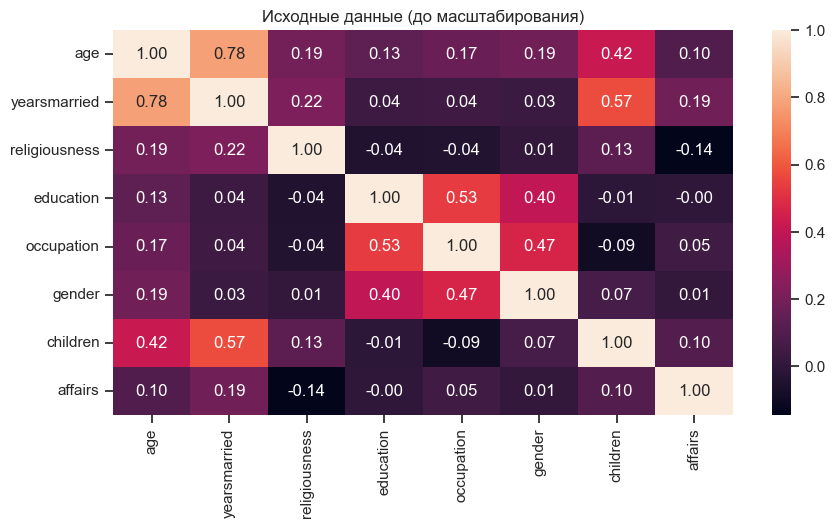

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

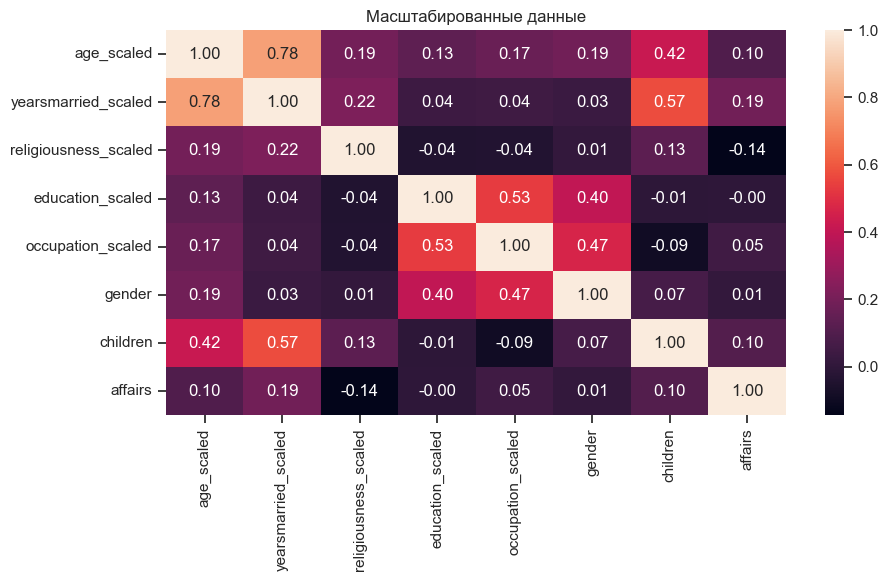

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

In [34]:
class Metric_:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [37]:
# Признаки для задачи регрессии
regress_cols = ['age_scaled', 'yearsmarried_scaled', 
                  'occupation_scaled', 'children']

In [38]:
# Выборки
X = data[regress_cols]
Y = data['affairs']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((420, 4), (181, 4), (420,), (181,))

In [39]:
# Модели
regress_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [40]:
# Сохранение метрик
regrMetric_ = Metric_()

In [41]:
def regr_train_model(model_name, model, regrMetric_):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    regrMetric_.add('MAE', model_name, mae)
    regrMetric_.add('MSE', model_name, mse)
    regrMetric_.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [42]:
for model_name, model in regress_models.items():
    regr_train_model(model_name, model, regrMetric_)

C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

LR 	 MAE=2.21, MSE=11.114, R2=0.052
KNN_5 	 MAE=2.302, MSE=12.856, R2=-0.096
SVR 	 MAE=1.514, MSE=13.57, R2=-0.157
Tree 	 MAE=2.469, MSE=16.688, R2=-0.423
RF 	 MAE=2.411, MSE=13.902, R2=-0.185
GB 	 MAE=2.287, MSE=11.78, R2=-0.004


C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

In [43]:
X_train.shape

(420, 4)

In [44]:
n_range = np.array(range(1,2000,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
         1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}]

In [45]:
%%time
regress_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regress_gs.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 236, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 810

CPU times: total: 2.94 s
Wall time: 1.75 s


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 236, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 810

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}],
             scoring='neg_mean_squared_error')

In [46]:
# Лучшая модель
regress_gs.best_estimator_

KNeighborsRegressor(n_neighbors=101)

In [47]:
# Лучшее значение параметров
regress_gs.best_params_

{'n_neighbors': 101}

In [48]:
regress_gs_best_params_txt = str(regress_gs.best_params_['n_neighbors'])
regress_gs_best_params_txt


'101'

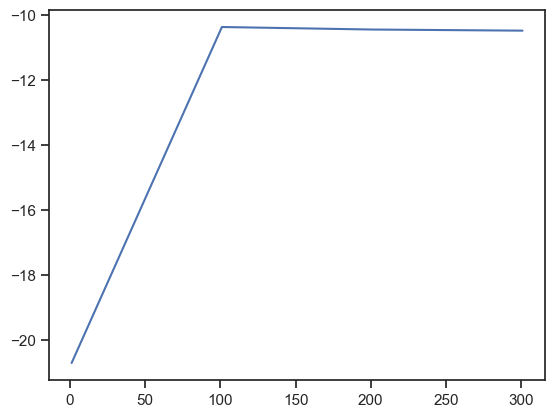

In [49]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regress_gs.cv_results_['mean_test_score'])

In [50]:
regress_models_grid = {'KNN_5':KNeighborsRegressor(n_neighbors=5), 
                    str('KNN_'+regress_gs_best_params_txt):regress_gs.best_estimator_}

In [52]:
for model_name, model in regress_models_grid.items():
    regr_train_model(model_name, model, regrMetric_)

KNN_5 	 MAE=2.302, MSE=12.856, R2=-0.096
KNN_101 	 MAE=2.281, MSE=11.348, R2=0.032


C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\mihae\AppData\Local\Temp\ipykernel_21104\3714091736.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

In [54]:
# Метрики качества модели
regress_metrics = regrMetric_.df['metric'].unique()
regress_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

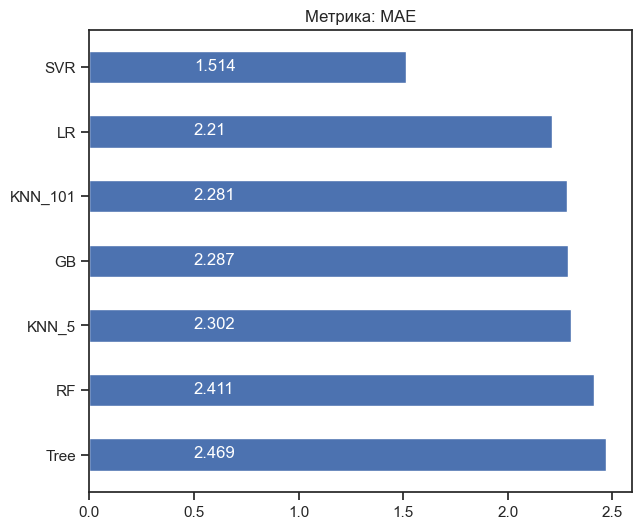

In [55]:
regrMetric_.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

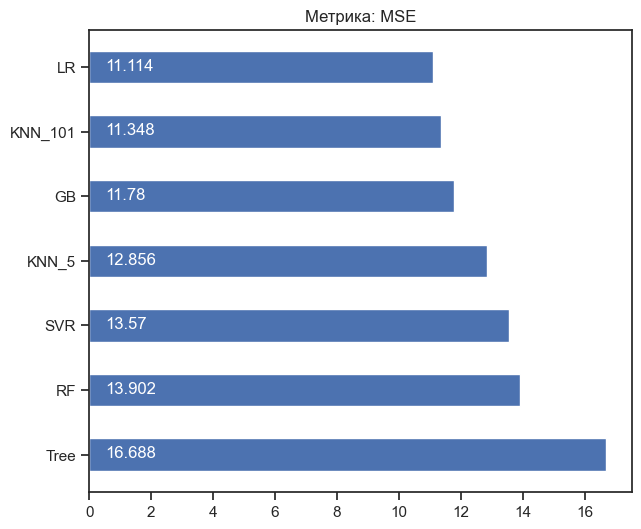

In [56]:
regrMetric_.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

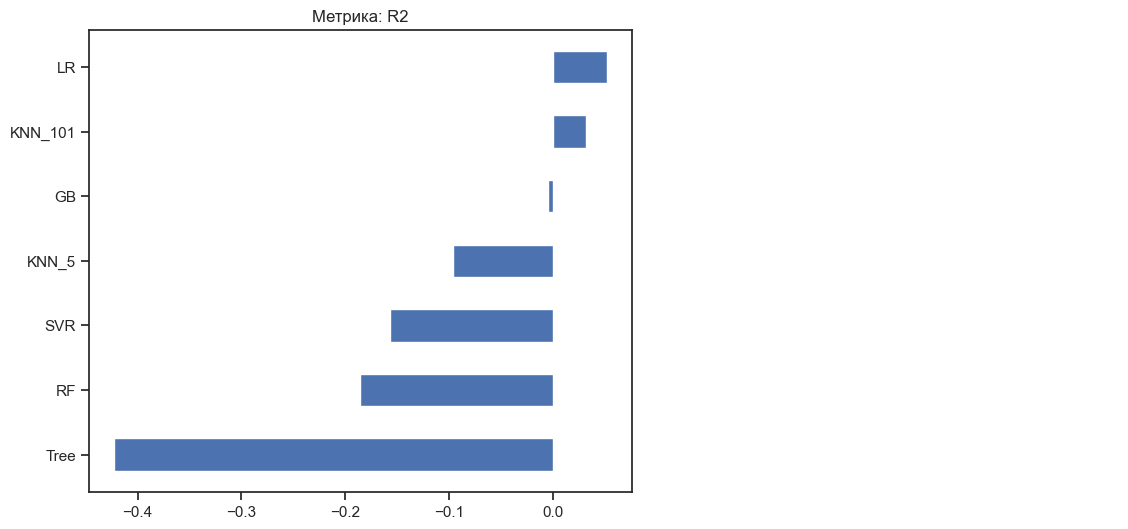

In [57]:
regrMetric_.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))